# Data Mining Assignment 7

## Task 1: Data Extraction & Preprocessing


In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

df = pd.read_csv('data/reviews.csv')
df.drop(['id', 'dateAdded', 'dateUpdated', 'address', 'categories', 'primaryCategories', 'country', 'city', 'keys',
         'latitude', 'longitude', 'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
         'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites',
         'reviews.title'], axis=1, inplace=True)

# everything lowercase
df['reviews.text'] = df['reviews.text'].str.lower()

# only 2 nan values -> drop them
df = df.dropna(how='any', axis=0)

# remove stopwords
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove numbers and special chars
df['reviews.text'] = df['reviews.text'].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True).replace('',
                                                                                                                  np.nan,
                                                                                                                  regex=False)

# remove multiple spaces with single space
df['reviews.text'] = df['reviews.text'].replace(r'\s+', ' ', regex=True)

# split text into array
df['reviews.text'] = df['reviews.text'].str.split(' ')

# remove now empty rows
df = df.dropna(how='any', axis=0)

# remove empty words
df['reviews.text'] = df['reviews.text'].apply(lambda arr: list(filter(None, arr)))

# remove short words
df['reviews.text'] = df['reviews.text'].apply(lambda arr: [word for word in arr if len(word) > 1])

# remove now empty rows
df = df.dropna(how='any', axis=0)

# stem words
stemmer = SnowballStemmer("english")
df['reviews.text'] = df['reviews.text'].apply(lambda x: [stemmer.stem(y) for y in x])  # Stem every word.

# concat again for wordcloud
df['concat_review'] = df['reviews.text'].apply(lambda arr: ' '.join(arr))

df

,reviews.rating,reviews.text,concat_review
0,5.0,"[experi, rancho, valencia, absolut, perfect, b...",experi rancho valencia absolut perfect begin e...
1,5.0,"[amaz, place, everyon, extrem, warm, welcom, w...",amaz place everyon extrem warm welcom weve sta...
2,5.0,"[book, night, stay, rancho, valencia, play, te...",book night stay rancho valencia play tenni sin...
3,2.0,"[current, bed, write, past, hr, dog, bark, squ...",current bed write past hr dog bark squeal call...
4,5.0,"[live, md, aloft, home, away, homew, stay, nig...",live md aloft home away homew stay night staff...
...,...,...,...
9995,3.0,"[hard, review, oceanfront, hotel, go, ocean, n...",hard review oceanfront hotel go ocean necessar...
9996,4.0,"[live, close, by, need, stay, somewher, night,...",live close by need stay somewher night due ren...
9997,4.0,"[roll, laid, head, woke, continent, breakfast,...",roll laid head woke continent breakfast roll d...
9998,1.0,"[absolut, terriblei, told, given, non, smoke, ...",absolut terriblei told given non smoke room wa...


## Task 2: Visualization – Wordcloud


In [53]:
# good: rating >= 4
df_good = df.loc[df['reviews.rating'] >= 4]
# bad: rating <=2
df_bad = df.loc[df['reviews.rating'] <= 2]

df_bad.count()

reviews.rating       1153
reviews.text         1153
concat_review        1153
text_string_fdist    1153
text_string_lem      1153
neg                  1153
neu                  1153
pos                  1153
compound             1153
sentiment            1153
polarity_afn         1153
sentiment_afn        1153
dtype: int64

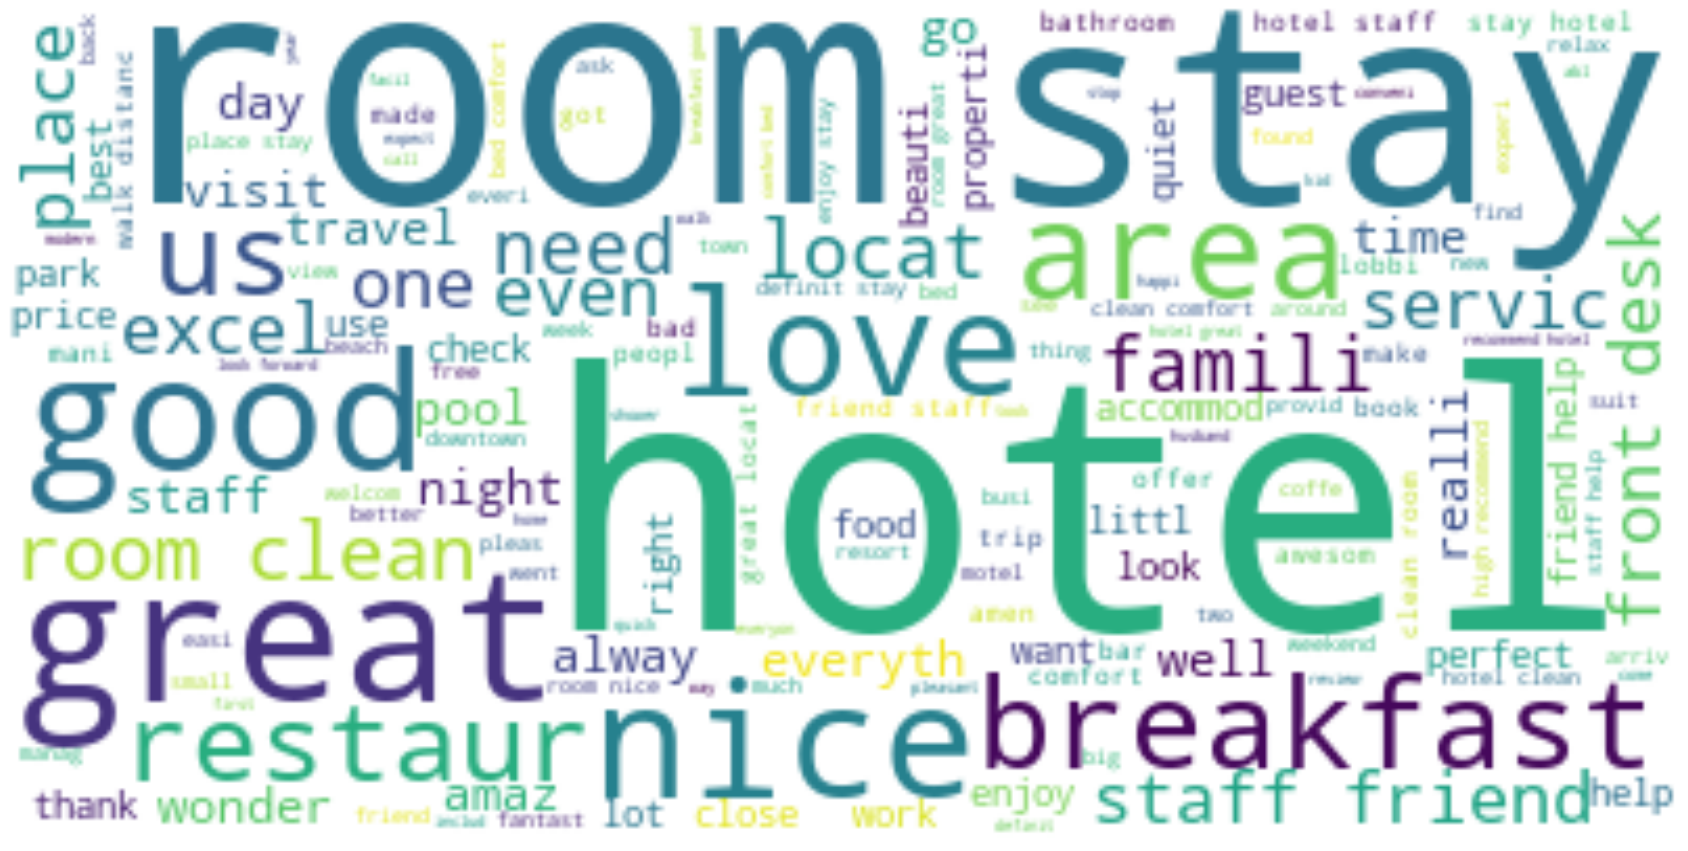

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(i for i in df_good['concat_review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('exports/01_good_reviews.png')
plt.show()

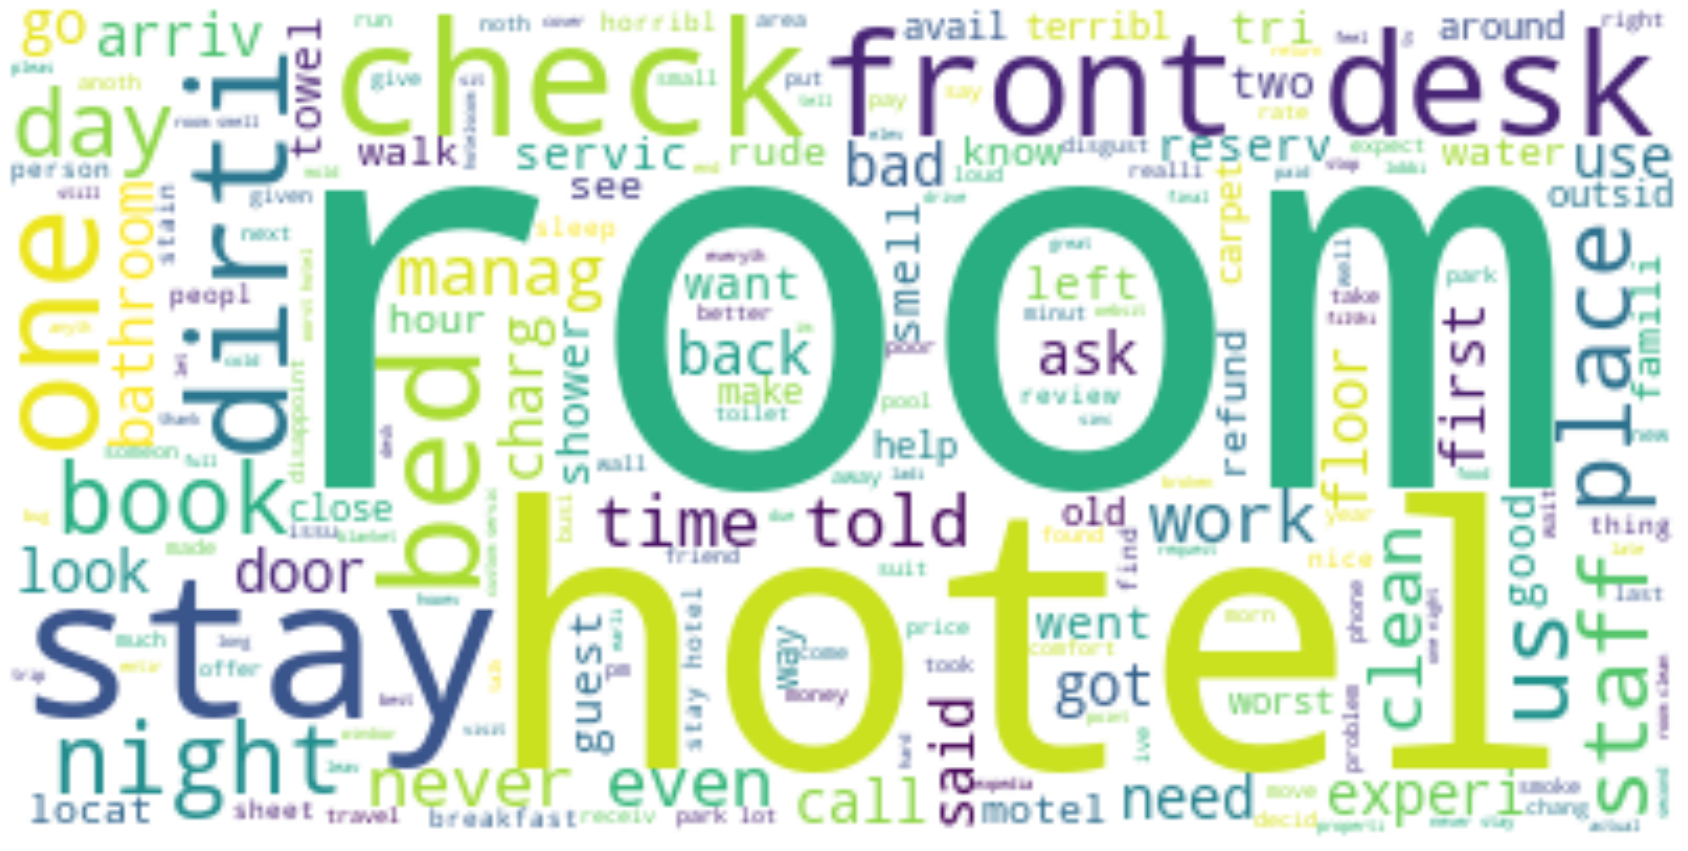

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(i for i in df_bad['concat_review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('exports/02_bad_reviews.png')
plt.show()

## Task 3: Sentiment Analysis

In [25]:
import nltk
from nltk.probability import FreqDist

all_words = ' '.join([word for word in df['concat_review']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

# calculate
fdist = FreqDist(tokenized_words)

df['text_string_fdist'] = df['reviews.text'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3]))


,reviews.rating,reviews.text,concat_review,text_string_fdist
0,5.0,"[experi, rancho, valencia, absolut, perfect, b...",experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...
1,5.0,"[amaz, place, everyon, extrem, warm, welcom, w...",amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...
2,5.0,"[book, night, stay, rancho, valencia, play, te...",book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...
3,2.0,"[current, bed, write, past, hr, dog, bark, squ...",current bed write past hr dog bark squeal call...,current bed write past hr dog bark squeal call...
4,5.0,"[live, md, aloft, home, away, homew, stay, nig...",live md aloft home away homew stay night staff...,live md aloft home away homew stay night staff...
...,...,...,...,...
9995,3.0,"[hard, review, oceanfront, hotel, go, ocean, n...",hard review oceanfront hotel go ocean necessar...,hard review oceanfront hotel go ocean necessar...
9996,4.0,"[live, close, by, need, stay, somewher, night,...",live close by need stay somewher night due ren...,live close by need stay somewher night due ren...
9997,4.0,"[roll, laid, head, woke, continent, breakfast,...",roll laid head woke continent breakfast roll d...,roll laid head woke continent breakfast roll d...
9998,1.0,"[absolut, terriblei, told, given, non, smoke, ...",absolut terriblei told given non smoke room wa...,absolut terriblei told given non smoke room wa...


In [27]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [30]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

all_words_lem = ' '.join([word for word in df['text_string_lem']])
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)
fd.most_common(3)

[('room', 8798), ('hotel', 7174), ('stay', 6055)]

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JKU\AppData\Roaming\nltk_data...


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,reviews.rating,reviews.text,concat_review,text_string_fdist,text_string_lem,polarity
9997,4.0,"[roll, laid, head, woke, continent, breakfast,...",roll laid head woke continent breakfast roll d...,roll laid head woke continent breakfast roll d...,roll laid head woke continent breakfast roll d...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
9998,1.0,"[absolut, terriblei, told, given, non, smoke, ...",absolut terriblei told given non smoke room wa...,absolut terriblei told given non smoke room wa...,absolut terriblei told given non smoke room wa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9999,1.0,"[filthi, outdat, noisi, neighbour, worst, near...",filthi outdat noisi neighbour worst near eaten...,filthi outdat noisi neighbour worst near eaten...,filthi outdat noisi neighbour worst near eaten...,"{'neg': 0.265, 'neu': 0.647, 'pos': 0.087, 'co..."


In [34]:
# Change data structure
df = pd.concat(
    [df.drop(['polarity'], axis=1),
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,reviews.rating,reviews.text,concat_review,text_string_fdist,text_string_lem,neg,neu,pos,compound
0,5.0,"[experi, rancho, valencia, absolut, perfect, b...",experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...,0.0,0.686,0.314,0.7506
1,5.0,"[amaz, place, everyon, extrem, warm, welcom, w...",amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...,0.0,0.738,0.262,0.8225
2,5.0,"[book, night, stay, rancho, valencia, play, te...",book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...,0.0,0.660,0.340,0.9559


In [41]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')
df.head(10)

,reviews.rating,reviews.text,concat_review,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,5.0,"[experi, rancho, valencia, absolut, perfect, b...",experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...,0.000,0.686,0.314,0.7506,positive
1,5.0,"[amaz, place, everyon, extrem, warm, welcom, w...",amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...,0.000,0.738,0.262,0.8225,positive
2,5.0,"[book, night, stay, rancho, valencia, play, te...",book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...,0.000,0.660,0.340,0.9559,positive
3,2.0,"[current, bed, write, past, hr, dog, bark, squ...",current bed write past hr dog bark squeal call...,current bed write past hr dog bark squeal call...,current bed write past hr dog bark squeal call...,0.000,1.000,0.000,0.0000,neutral
4,5.0,"[live, md, aloft, home, away, homew, stay, nig...",live md aloft home away homew stay night staff...,live md aloft home away homew stay night staff...,live md aloft home away homew stay night staff...,0.043,0.679,0.278,0.8225,positive
5,5.0,"[stay, famili, daughter, wed, accommod, staff,...",stay famili daughter wed accommod staff olivia...,stay famili daughter wed accommod staff olivia...,stay famili daughter wed accommod staff olivia...,0.000,0.691,0.309,0.7650,positive
6,5.0,"[beauti, room, nicest, peopl, work, there, fro...",beauti room nicest peopl work there front desk...,beauti room nicest peopl work there front desk...,beauti room nicest peopl work there front desk...,0.000,0.657,0.343,0.9274,positive
7,5.0,"[stay, visit, maryland, live, cute, hotel, gre...",stay visit maryland live cute hotel great loca...,stay visit maryland live cute hotel great loca...,stay visit maryland live cute hotel great loca...,0.000,0.457,0.543,0.9584,positive
8,5.0,"[travel, lot, job, im, constant, stay, hotel, ...",travel lot job im constant stay hotel cowork a...,travel lot job im constant stay hotel cowork a...,travel lot job im constant stay hotel cowork a...,0.000,0.956,0.044,0.0772,positive
9,5.0,"[line, work, use, meet, space, hotel, often, y...",line work use meet space hotel often year work...,line work use meet space hotel often year work...,line work use meet space hotel often year work...,0.000,0.934,0.066,0.2960,positive


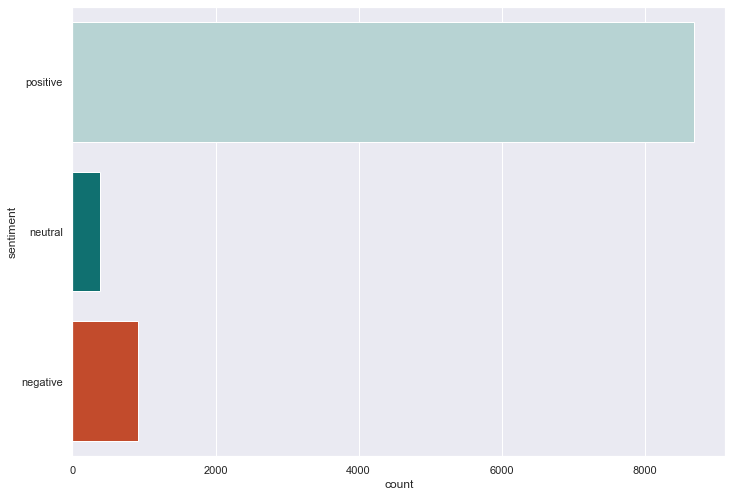

In [43]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Number of sentiments
temp_plot = sns.countplot(y='sentiment',
              data=df,
              palette=['#b2d8d8', "#008080", '#db3d13']
              );
fig = temp_plot.get_figure()
fig.savefig("exports/03_number_of_sentiments.png")

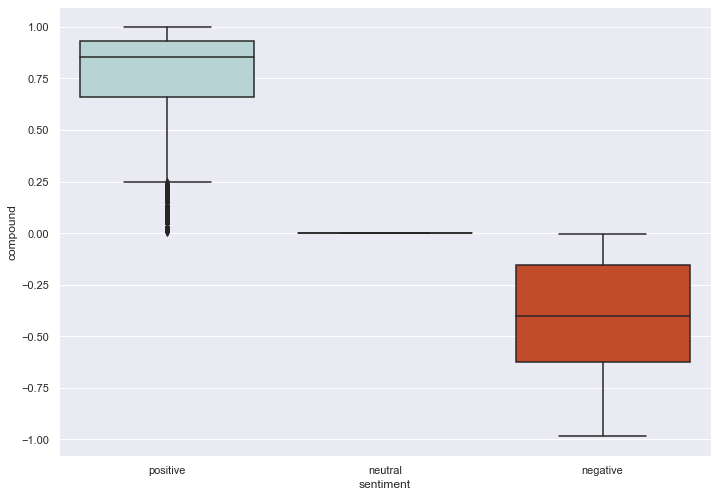

In [45]:
# Boxplot
temp_box_plt = sns.boxplot(y='compound',
            x='sentiment',
            palette=['#b2d8d8', "#008080", '#db3d13'],
            data=df);
fig = temp_box_plt.get_figure()
fig.savefig("exports/04_boxplots.png")

In [47]:
from afinn import Afinn

afn = Afinn()


df['polarity_afn'] = df['text_string_lem'].apply(lambda x: afn.score(x))
df['sentiment_afn'] = df['polarity_afn'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')

In [48]:
df

,reviews.rating,reviews.text,concat_review,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment,polarity_afn,sentiment_afn
0,5.0,"[experi, rancho, valencia, absolut, perfect, b...",experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...,experi rancho valencia absolut perfect begin e...,0.000,0.686,0.314,0.7506,positive,3.0,positive
1,5.0,"[amaz, place, everyon, extrem, warm, welcom, w...",amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...,amaz place everyon extrem warm welcom weve sta...,0.000,0.738,0.262,0.8225,positive,8.0,positive
2,5.0,"[book, night, stay, rancho, valencia, play, te...",book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...,book night stay rancho valencia play tenni sin...,0.000,0.660,0.340,0.9559,positive,13.0,positive
3,2.0,"[current, bed, write, past, hr, dog, bark, squ...",current bed write past hr dog bark squeal call...,current bed write past hr dog bark squeal call...,current bed write past hr dog bark squeal call...,0.000,1.000,0.000,0.0000,neutral,0.0,neutral
4,5.0,"[live, md, aloft, home, away, homew, stay, nig...",live md aloft home away homew stay night staff...,live md aloft home away homew stay night staff...,live md aloft home away homew stay night staff...,0.043,0.679,0.278,0.8225,positive,1.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,"[hard, review, oceanfront, hotel, go, ocean, n...",hard review oceanfront hotel go ocean necessar...,hard review oceanfront hotel go ocean necessar...,hard review oceanfront hotel go ocean necessar...,0.043,0.708,0.249,0.7717,positive,6.0,positive
9996,4.0,"[live, close, by, need, stay, somewher, night,...",live close by need stay somewher night due ren...,live close by need stay somewher night due ren...,live close by need stay somewher night due ren...,0.000,0.778,0.222,0.7717,positive,6.0,positive
9997,4.0,"[roll, laid, head, woke, continent, breakfast,...",roll laid head woke continent breakfast roll d...,roll laid head woke continent breakfast roll d...,roll laid head woke continent breakfast roll d...,0.000,0.667,0.333,0.8591,positive,9.0,positive
9998,1.0,"[absolut, terriblei, told, given, non, smoke, ...",absolut terriblei told given non smoke room wa...,absolut terriblei told given non smoke room wa...,absolut terriblei told given non smoke room wa...,0.000,1.000,0.000,0.0000,neutral,0.0,neutral


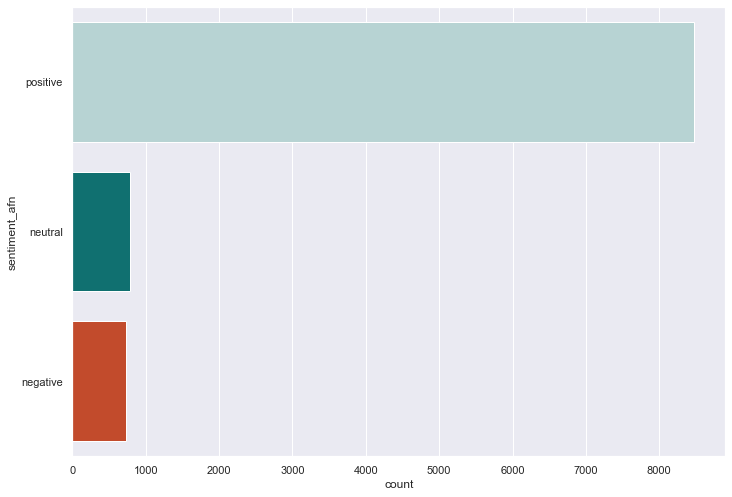

In [49]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Number of sentiments
temp_plot = sns.countplot(y='sentiment_afn',
              data=df,
              palette=['#b2d8d8', "#008080", '#db3d13']
              );
fig = temp_plot.get_figure()
fig.savefig("exports/04_number_of_sentiments_afn.png")

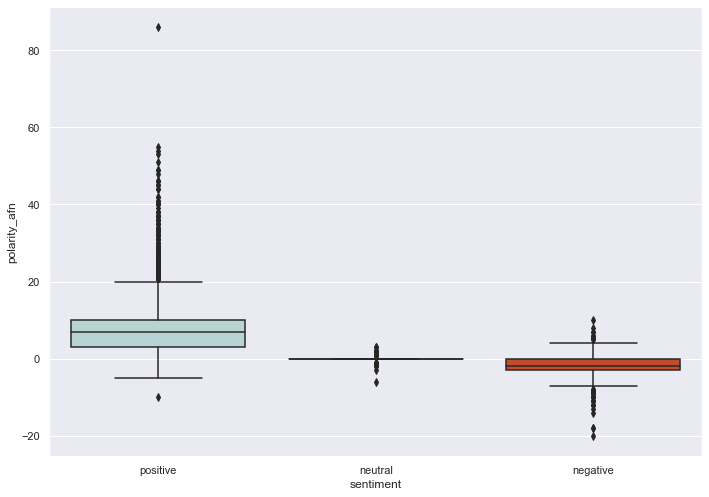

In [50]:
# Boxplot
temp_box_plt = sns.boxplot(y='polarity_afn',
            x='sentiment',
            palette=['#b2d8d8', "#008080", '#db3d13'],
            data=df);
fig = temp_box_plt.get_figure()
fig.savefig("exports/05_boxplots_afn.png")